<a href="https://colab.research.google.com/github/ysooch0819/AI16-Projects/blob/main/n421%20%EA%B0%95%EC%9D%98%EB%85%B8%ED%8A%B8%20%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")

tokenizer = Tokenizer(nlp.vocab)

In [16]:
sent1 = "I am a student."
sent2 = "J is the alphabet that follows i."
sent3 = "Is she a student trying to become a data scientist?"

sent_list = [sent1, sent2, sent3]

total_tokens = []

for i, sent in enumerate(tokenizer.pipe(sent_list)):
    sent_token = [token.text for token in sent]
    total_tokens.extend(sent_token)
    print(f"sent{i+1} : {sent_token}")

token_set = set(total_tokens)

print(f"""
total_tokens : {token_set}
#_of_total_tokens : {len(token_set)}
""")

sent1 : ['I', 'am', 'a', 'student.']
sent2 : ['J', 'is', 'the', 'alphabet', 'that', 'follows', 'i.']
sent3 : ['Is', 'she', 'a', 'student', 'trying', 'to', 'become', 'a', 'data', 'scientist?']

total_tokens : {'student', 'follows', 'am', 'student.', 'trying', 'data', 'i.', 'a', 'I', 'alphabet', 'become', 'she', 'J', 'scientist?', 'to', 'that', 'the', 'Is', 'is'}
#_of_total_tokens : 19



In [14]:
def word2idx(sent, total):
    sent_token = sent.split()
    return [1 if word in sent_token else 0 for word in total]

sent1_idx = word2idx(sent1, token_set)
sent2_idx = word2idx(sent2, token_set)
sent3_idx = word2idx(sent3, token_set)

In [15]:
token_set

{'I',
 'Is',
 'J',
 'a',
 'alphabet',
 'am',
 'become',
 'data',
 'follows',
 'i.',
 'is',
 'scientist?',
 'she',
 'student',
 'student.',
 'that',
 'the',
 'to',
 'trying'}

In [7]:
sent1_idx

[0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [18]:
import pandas as pd

dtm = pd.DataFrame([sent1_idx, sent2_idx, sent3_idx], columns=token_set)
dtm

,student,follows,am,student.,trying,data,i.,a,I,alphabet,become,she,J,scientist?,to,that,the,Is,is
0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1
2,1,0,0,0,1,1,0,1,0,0,1,1,0,1,1,0,0,1,0


In [19]:
'student' in ['student.']

False

In [20]:
import re

def lower_and_regex(sentence):
    sentence = sentence.lower()
    sentence = re.sub(r"[^a-z ]", "", sentence)
    return sentence

prep_sent_list = [lower_and_regex(sent) for sent in sent_list]
total_tokens_prep = []

for i, prep_sent in enumerate(tokenizer.pipe(prep_sent_list)):
    sent_token_prep = [token.text for token in prep_sent]
    total_tokens_prep.extend(sent_token_prep)
    print(f"sent{i} : {sent_token_prep}")

token_set_prep= set(total_tokens_prep)

print(f"""
total_tokens : {token_set_prep}
#_of_total_tokens : {len(token_set_prep)}
""")

sent0 : ['i', 'am', 'a', 'student']
sent1 : ['j', 'is', 'the', 'alphabet', 'that', 'follows', 'i']
sent2 : ['is', 'she', 'a', 'student', 'trying', 'to', 'become', 'a', 'data', 'scientist']

total_tokens : {'student', 'that', 'j', 'scientist', 'follows', 'am', 'to', 'she', 'trying', 'data', 'the', 'i', 'is', 'alphabet', 'become', 'a'}
#_of_total_tokens : 16



In [21]:
sent1_idx_prep = word2idx(lower_and_regex(sent1), token_set_prep)
sent2_idx_prep = word2idx(lower_and_regex(sent2), token_set_prep)
sent3_idx_prep = word2idx(lower_and_regex(sent3), token_set_prep)

dtm_re = pd.DataFrame([sent1_idx_prep, sent2_idx_prep, sent3_idx_prep], columns=set(total_tokens_prep))
dtm_re

,student,that,j,scientist,follows,am,to,she,trying,data,the,i,is,alphabet,become,a
0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,0,1,1,0,1,0,0,0,0,0,1,1,1,1,0,0
2,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,1


In [22]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/amazon/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19_sample.csv')
df.shape

(10483, 25)

In [23]:
df.head(3)

,Unnamed: 0,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,25971,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",Amazon,53-004485,2017-01-18T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z",NaN,True,NaN,0.0,3,http://reviews.bestbuy.com/3545/5620410/review...,Though I have got it for cheap price during bl...,An average Fire tablet,Ganamurthy,http://reviews.bestbuy.com/3545/5620410/review...
1,19398,AVwjfXqqQMlgsOJE8qmm,2017-05-20T01:34:04Z,2019-02-25T02:23:15Z,"All-New Fire HD 8 Kids Edition Tablet, 8 HD Di...",B01J94SCAM,Amazon,"Fire Tablets,Tablets,Amazon Tablets,Computers ...",Electronics,https://www.barcodable.com/images/barcode/0841...,amazonfirehd8kidsedition8tablet32gb7thgenerati...,Amazon,53-005705,2017-06-22T00:00:00.000Z,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",NaN,True,NaN,17.0,5,http://reviews.bestbuy.com/3545/5836204/review...,"I purchased the 7"" for my son when he was 1.5 ...",3 year old loves it,dcc1970,https://reviews.bestbuy.com/3545/5836204/revie...
2,2410,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2015-04-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Great price and great batteries! I will keep o...,Five Stars,ByDena,"https://www.barcodable.com/upc/841710106442,ht..."


In [24]:
df['brand'].value_counts()

Amazon          5977
Amazonbasics    4499
AmazonBasics       7
Name: brand, dtype: int64

In [25]:
df['brand'] = df['brand'].apply(lambda  x: x.lower())
df['brand'].value_counts()

amazon          5977
amazonbasics    4506
Name: brand, dtype: int64

In [28]:
regex = r"[^a-zA-Z0-9 ]"

test_str = '("(Natural Language Processing) is easy!, AI!\n")'

subst = ""

result = re.sub(regex, subst, test_str)
result

'Natural Language Processing is easy AI'

In [29]:
def tokenize(text):
    tokens = re.sub(regex, subst, text)
    tokens = tokens.lower().split()
    return tokens

In [30]:
df['tokens'] = df['reviews.text'].apply(tokenize)
df['tokens'].head()

0    [though, i, have, got, it, for, cheap, price, ...
1    [i, purchased, the, 7, for, my, son, when, he,...
2    [great, price, and, great, batteries, i, will,...
3    [great, tablet, for, kids, my, boys, love, the...
4    [they, lasted, really, little, some, of, them,...
Name: tokens, dtype: object

In [31]:
df[['reviews.text', 'tokens']].head(10)

,reviews.text,tokens
0,Though I have got it for cheap price during bl...,"[though, i, have, got, it, for, cheap, price, ..."
1,"I purchased the 7"" for my son when he was 1.5 ...","[i, purchased, the, 7, for, my, son, when, he,..."
2,Great price and great batteries! I will keep o...,"[great, price, and, great, batteries, i, will,..."
3,Great tablet for kids my boys love their table...,"[great, tablet, for, kids, my, boys, love, the..."
4,They lasted really little.. (some of them) I u...,"[they, lasted, really, little, some, of, them,..."
5,"I purchased 2 others for my 5 & 6yr-olds, and ...","[i, purchased, 2, others, for, my, 5, 6yrolds,..."
6,We purchased Amazon Fire kids edition tablet t...,"[we, purchased, amazon, fire, kids, edition, t..."
7,Got this when they were on sale last year and ...,"[got, this, when, they, were, on, sale, last, ..."
8,Lotta batteries. at a good price.,"[lotta, batteries, at, a, good, price]"
9,Best deal and work as expected,"[best, deal, and, work, as, expected]"


In [33]:
from collections import Counter

word_counts = Counter()

df['tokens'].apply(lambda x: word_counts.update(x))

word_counts.most_common(10)

[('the', 10514),
 ('and', 8137),
 ('i', 7465),
 ('to', 7150),
 ('for', 6617),
 ('a', 6421),
 ('it', 6096),
 ('my', 4119),
 ('is', 4111),
 ('this', 3752)]

In [34]:
def word_count(docs):
    word_counts = Counter()
    word_in_docs = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))
    
    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['percent'] = wc['count'].apply(lambda x: x/total)
    wc = wc.sort_values(by='rank')

    wc['cul_percnt'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')

    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x/total_docs)

    return wc.sort_values(by='rank')

In [35]:
wc = word_count(df['tokens'])
wc.head()

,word,word_in_docs,count,rank,percent,cul_percnt,word_in_docs_percent
85,the,4909,10514,1.0,0.039353,0.039353,0.468282
24,and,5064,8137,2.0,0.030456,0.069809,0.483068
32,i,3781,7465,3.0,0.027941,0.097750,0.360679
140,to,4157,7150,4.0,0.026762,0.124512,0.396547
14,for,4477,6617,5.0,0.024767,0.149278,0.427072


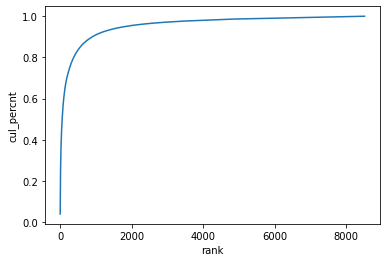

In [36]:
import seaborn as sns

sns.lineplot(x='rank', y='cul_percnt', data=wc)

In [37]:
wc[wc['rank']<=1000]['cul_percnt'].max()

0.9097585076280484

In [38]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


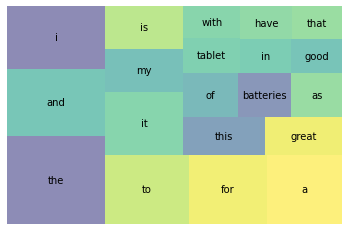

In [39]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank']<=20]
squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

In [40]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")

tokenizer = Tokenizer(nlp.vocab)

In [42]:
df.head()

,Unnamed: 0,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,tokens
0,25971,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",Amazon,53-004485,2017-01-18T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z",NaN,True,NaN,0.0,3,http://reviews.bestbuy.com/3545/5620410/review...,Though I have got it for cheap price during bl...,An average Fire tablet,Ganamurthy,http://reviews.bestbuy.com/3545/5620410/review...,"[though, i, have, got, it, for, cheap, price, ..."
1,19398,AVwjfXqqQMlgsOJE8qmm,2017-05-20T01:34:04Z,2019-02-25T02:23:15Z,"All-New Fire HD 8 Kids Edition Tablet, 8 HD Di...",B01J94SCAM,amazon,"Fire Tablets,Tablets,Amazon Tablets,Computers ...",Electronics,https://www.barcodable.com/images/barcode/0841...,amazonfirehd8kidsedition8tablet32gb7thgenerati...,Amazon,53-005705,2017-06-22T00:00:00.000Z,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",NaN,True,NaN,17.0,5,http://reviews.bestbuy.com/3545/5836204/review...,"I purchased the 7"" for my son when he was 1.5 ...",3 year old loves it,dcc1970,https://reviews.bestbuy.com/3545/5836204/revie...,"[i, purchased, the, 7, for, my, son, when, he,..."
2,2410,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2015-04-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Great price and great batteries! I will keep o...,Five Stars,ByDena,"https://www.barcodable.com/upc/841710106442,ht...","[great, price, and, great, batteries, i, will,..."
3,25259,AVqVGWLKnnc1JgDc3jF1,2017-03-03T16:55:53Z,2019-02-25T02:03:34Z,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",B018Y23MNM,amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,firekidseditiontablet7displaywifi16gbgreenkidp...,Amazon,53-004683,2016-10-03T00:00:00.000Z,"2017-06-04T00:00:00Z,2017-06-03T00:00:00Z",NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5026300/review...,Great tablet for kids my boys love their table...,Great Tablet for Kids,aboye004,http://reviews.bestbuy.com/3545/5026300/review...,"[great, tablet, for, kids, my, boys, love, the..."
4,7469,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-04-24T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,2,https://www.amazon.com/product-reviews/B00QWO9...,They lasted really little.. (some of them) I u...,They lasted really little.. (some of them) I ...,ByOctavio Chavez,"https://www.barcodable.com/upc/841710106442,ht...","[they, lasted, really, little, some, of, them,..."


In [43]:
tokens = []

for doc in tokenizer.pipe(df['reviews.text']):
    doc_tokens = [re.sub(r"[^a-z0-9]", "", token.text.lower()) for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens
df['tokens'].head()

0    [though, i, have, got, it, for, cheap, price, ...
1    [i, purchased, the, 7, for, my, son, when, he,...
2    [great, price, and, great, batteries, i, will,...
3    [great, tablet, for, kids, my, boys, love, the...
4    [they, lasted, really, little, some, of, them,...
Name: tokens, dtype: object

In [44]:
wc = word_count(df['tokens'])
wc.head()

,word,word_in_docs,count,rank,percent,cul_percnt,word_in_docs_percent
85,the,4909,10514,1.0,0.039229,0.039229,0.468282
24,and,5064,8137,2.0,0.030360,0.069589,0.483068
32,i,3781,7465,3.0,0.027853,0.097442,0.360679
141,to,4157,7150,4.0,0.026678,0.124120,0.396547
14,for,4477,6617,5.0,0.024689,0.148809,0.427072


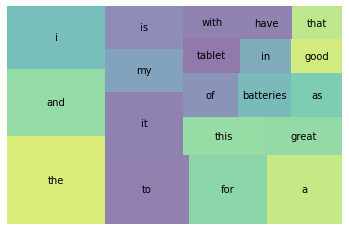

In [45]:
wc_top20 = wc[wc['rank']<=20]

squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

In [46]:
print(nlp.Defaults.stop_words)

{'became', 'your', 'had', 'meanwhile', 'except', 'yet', 'may', 'how', 'whereupon', 'least', 'being', 'somehow', 'these', 'their', 'whose', "'m", '‘d', 'part', 'whereas', 'done', 'next', 'serious', 'might', 'myself', 'whatever', "'ve", 'ever', 'each', 'be', 'those', 'see', 'is', 'somewhere', 'around', 'more', 'perhaps', 'whither', 'five', 'this', 'him', 'who', '‘s', 'rather', 'below', 'thence', 'does', 'such', 'again', 'twenty', 'hers', 'never', 'unless', 'his', 'yours', '‘re', 'on', 'twelve', 'while', 'but', 'than', '’re', 'too', '‘ll', 'should', 'every', 'just', 'onto', 'anyone', 'mostly', 'thus', 'give', 'were', 'am', 'both', 'thereby', 'others', 'n‘t', '‘ve', 'which', 'now', 'our', 'are', 'namely', 'neither', 'whereafter', 'mine', 'less', 'up', 'third', 'until', 'move', 'say', 'an', 'why', 'within', 'herein', 'therefore', 'for', 'themselves', 'thereupon', 'and', 'not', 'it', 'my', 'by', 'else', 'someone', 'once', 'latterly', 'before', 'four', 'further', 'seem', 'he', 'at', 'eight', 

In [47]:
tokens = []

for doc in tokenizer.pipe(df['reviews.text']):
    doc_tokens =  []

    for token in doc:
        if (token.is_stop==False) & (token.is_punct  == False):
            doc_tokens.append(token.text.lower())
    
    tokens.append(doc_tokens)

df['tokens'] = tokens
df.tokens.head()

0    [got, cheap, price, black, friday,, fire, grea...
1    [purchased, 7", son, 1.5, years, old,, broke, ...
2    [great, price, great, batteries!, buying, anyt...
3         [great, tablet, kids, boys, love, tablets!!]
4    [lasted, little.., (some, them), use, batterie...
Name: tokens, dtype: object

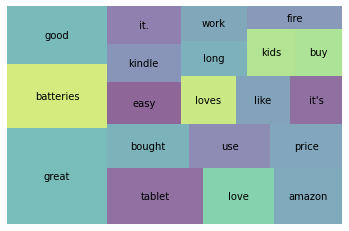

In [48]:
wc = word_count(df['tokens'])
wc_top20 = wc[wc['rank']<=20]

squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

In [49]:
print(type(nlp.Defaults.stop_words))

<class 'set'>


In [50]:
STOP_WORDS = nlp.Defaults.stop_words.union(['batteries', 'I', 'amazon', 'i', 'Amazon', 'it', "it's", 'it.', 'the', 'this'])

In [51]:
tokens = []

for doc in tokenizer.pipe(df['reviews.text']):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

wc = word_count(df['tokens'])
wc.head()

,word,word_in_docs,count,rank,percent,cul_percnt,word_in_docs_percent
58,great,2709,3080,1.0,0.024609,0.024609,0.258418
1,good,1688,1870,2.0,0.014941,0.039549,0.161023
68,tablet,1469,1752,3.0,0.013998,0.053547,0.140132
67,love,1183,1287,4.0,0.010283,0.063830,0.112849
106,bought,1103,1179,5.0,0.009420,0.073250,0.105218


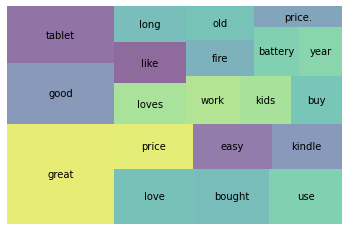

In [54]:
wc_top20 = wc[wc['rank']<=20]

squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

In [55]:
df['kindle'] = df['name'].str.contains('kindle', case=False)
wc_kindle = word_count(df[df['kindle'] ==  1]['tokens'])
wc.shape, wc_kindle.shape

((13497, 7), (2717, 7))

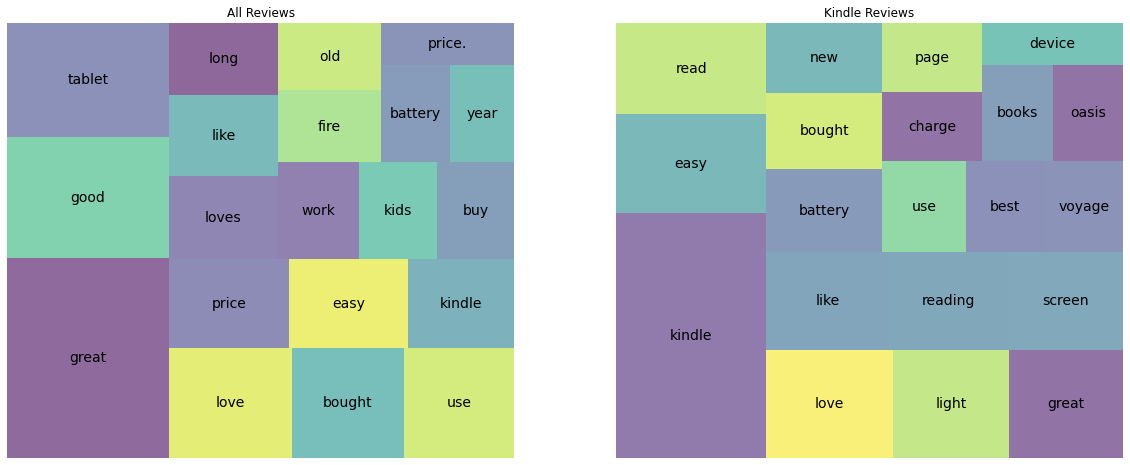

In [57]:
wc_top20 = wc[wc['rank']<=20]
wc_kindle_top20 = wc_kindle[wc_kindle['rank']<=20]

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes[0].set_title('All Reviews')
squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6, ax=axes[0], text_kwargs={'fontsize':14})
axes[0].axis('off')

axes[1].set_title('Kindle Reviews')
squarify.plot(sizes=wc_kindle_top20['percent'], label=wc_kindle_top20['word'], alpha=0.6, ax=axes[1], text_kwargs={'fontsize':14})
axes[1].axis('off')

plt.show()

In [61]:
wc['cul_percnt']

58       0.024609
1        0.039549
68       0.053547
67       0.063830
106      0.073250
           ...   
13492    0.999968
13493    0.999976
13494    0.999984
13495    0.999992
13496    1.000000
Name: cul_percnt, Length: 13497, dtype: float64

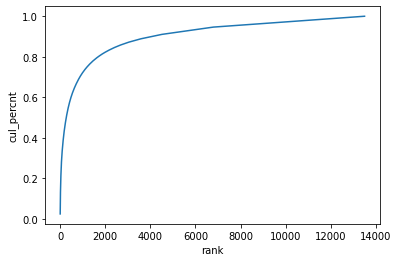

In [63]:
sns.lineplot(x='rank', y='cul_percnt', data=wc)

In [64]:
wc.tail(20)

,word,word_in_docs,count,rank,percent,cul_percnt,word_in_docs_percent
13477,functionalities,1,1,13478.0,0.000008,0.999848,0.000095
13478,good..,1,1,13479.0,0.000008,0.999856,0.000095
13479,itshe's,1,1,13480.0,0.000008,0.999864,0.000095
13480,geeks,1,1,13481.0,0.000008,0.999872,0.000095
13481,monday,1,1,13482.0,0.000008,0.999880,0.000095
13482,endure,1,1,13483.0,0.000008,0.999888,0.000095
13483,particularly.,1,1,13484.0,0.000008,0.999896,0.000095
13484,gifts!!,1,1,13485.0,0.000008,0.999904,0.000095
13485,duralast.,1,1,13486.0,0.000008,0.999912,0.000095
13487,manufacturing,1,1,13487.0,0.000008,0.999920,0.000095


In [65]:
wc['word_in_docs_percent'].describe()

count    13497.000000
mean         0.000838
std          0.004632
min          0.000095
25%          0.000095
50%          0.000095
75%          0.000382
max          0.258418
Name: word_in_docs_percent, dtype: float64

In [66]:
wc['word_in_docs_percent']

58       0.258418
1        0.161023
68       0.140132
67       0.112849
106      0.105218
           ...   
13492    0.000095
13493    0.000095
13494    0.000095
13495    0.000095
13496    0.000095
Name: word_in_docs_percent, Length: 13497, dtype: float64

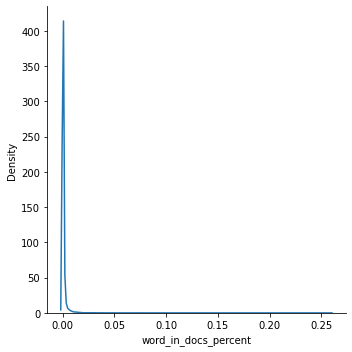

In [67]:
sns.displot(wc['word_in_docs_percent'], kind='kde')

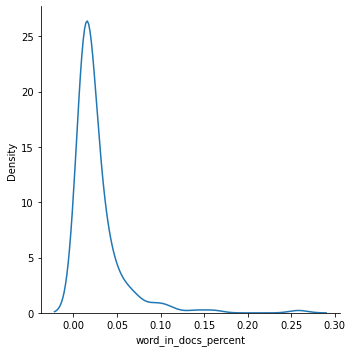

In [69]:
wc = wc[wc['word_in_docs_percent']>=0.01]

sns.displot(wc['word_in_docs_percent'], kind='kde');

In [70]:
print(wc.shape)
wc

(173, 7)


,word,word_in_docs,count,rank,percent,cul_percnt,word_in_docs_percent
58,great,2709,3080,1.0,0.024609,0.024609,0.258418
1,good,1688,1870,2.0,0.014941,0.039549,0.161023
68,tablet,1469,1752,3.0,0.013998,0.053547,0.140132
67,love,1183,1287,4.0,0.010283,0.063830,0.112849
106,bought,1103,1179,5.0,0.009420,0.073250,0.105218
...,...,...,...,...,...,...,...
563,bit,109,112,173.0,0.000895,0.428731,0.010398
937,fine,108,112,174.0,0.000895,0.429626,0.010302
338,pay,107,111,175.0,0.000887,0.430513,0.010207
875,value.,108,108,177.0,0.000863,0.432247,0.010302


In [71]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

words = ['wolf', 'wolves']

for word in words:
    print(ps.stem(word))

wolf
wolv


In [73]:
tokens=[]
for doc in df['tokens']:
    doc_tokens=[]
    for token in doc:
        doc_tokens.append(ps.stem(token))
    tokens.append(doc_tokens)

df['stems'] = tokens

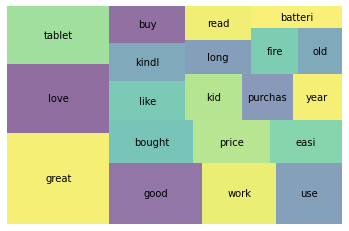

In [74]:
wc = word_count(df['stems'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6 )
plt.axis('off')
plt.show()

In [76]:
lem = "The social wolf, Wolves are complex."

nlp  = spacy.load("en_core_web_sm")

doc = nlp(lem)

for token in doc:
    print(token.text, "  ", token.lemma_)

The    the
social    social
wolf    wolf
,    ,
Wolves    wolf
are    be
complex    complex
.    .


In [77]:
def get_lemmas(text):
    lemmas=[]
    doc = nlp(text)

    for token in doc:
        if((token.is_stop==False) and (token.is_punct ==  False))  and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [78]:
df['lemmas'] = df['reviews.text'].apply(get_lemmas)
df['lemmas'].head()

0    [get, cheap, price, black, friday, Fire, great...
1    [purchase, 7, son, 1.5, year, old, break, wait...
2    [great, price, great, battery, buy, anytime, n...
3              [great, tablet, kid, boy, love, tablet]
4    [last, little, use, battery, lead, lamp, 2, 4,...
Name: lemmas, dtype: object

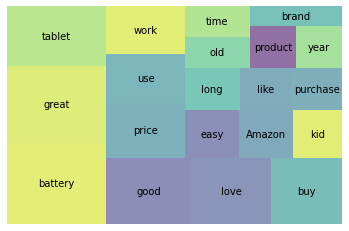

In [79]:
wc = word_count(df['lemmas'])
wc_top20 = wc[wc['rank']<=20]

squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

In [80]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

import spacy
nlp = spacy.load('en_core_web_sm')

In [81]:
text = """In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.
It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling.
The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word,
which helps to adjust for the fact that some words appear more frequently in general.
tf–idf is one of the most popular term-weighting schemes today.
A survey conducted in 2015 showed that 83% of text-based recommender systems in digital libraries use tf–idf."""

In [82]:
doc = nlp(text)
print([token.lemma_ for token in doc if(token.is_stop != True) and (token.is_punct != True)])

['information', 'retrieval', 'tf', 'idf', 'tfidf', 'short', 'term', 'frequency', 'inverse', 'document', 'frequency', 'numerical', 'statistic', 'intend', 'reflect', 'important', 'word', 'document', 'collection', 'corpus', '\n', 'weighting', 'factor', 'search', 'information', 'retrieval', 'text', 'mining', 'user', 'modeling', '\n', 'tf', 'idf', 'value', 'increase', 'proportionally', 'number', 'time', 'word', 'appear', 'document', 'offset', 'number', 'document', 'corpus', 'contain', 'word', '\n', 'help', 'adjust', 'fact', 'word', 'appear', 'frequently', 'general', '\n', 'tf', 'idf', 'popular', 'term', 'weight', 'scheme', 'today', '\n', 'survey', 'conduct', '2015', 'show', '83', 'text', 'base', 'recommender', 'system', 'digital', 'library', 'use', 'tf', 'idf']


In [83]:
sentences_list = text.split('\n')

vect = CountVectorizer()

vect.fit(sentences_list)

CountVectorizer()

In [84]:
dtm_count = vect.transform(sentences_list)

In [85]:
vect.vocabulary_

{'in': 26,
 'information': 28,
 'retrieval': 49,
 'tf': 60,
 'idf': 24,
 'or': 44,
 'tfidf': 61,
 'short': 52,
 'for': 18,
 'term': 58,
 'frequency': 19,
 'inverse': 30,
 'document': 14,
 'is': 31,
 'numerical': 39,
 'statistic': 55,
 'that': 62,
 'intended': 29,
 'to': 65,
 'reflect': 48,
 'how': 23,
 'important': 25,
 'word': 73,
 'collection': 9,
 'corpus': 12,
 'it': 32,
 'often': 42,
 'used': 68,
 'as': 6,
 'weighting': 71,
 'factor': 17,
 'searches': 51,
 'of': 40,
 'text': 59,
 'mining': 34,
 'and': 3,
 'user': 69,
 'modeling': 35,
 'the': 63,
 'value': 70,
 'increases': 27,
 'proportionally': 46,
 'number': 38,
 'times': 64,
 'appears': 5,
 'offset': 41,
 'by': 8,
 'documents': 15,
 'contain': 11,
 'which': 72,
 'helps': 22,
 'adjust': 2,
 'fact': 16,
 'some': 54,
 'words': 74,
 'appear': 4,
 'more': 36,
 'frequently': 20,
 'general': 21,
 'one': 43,
 'most': 37,
 'popular': 45,
 'schemes': 50,
 'today': 66,
 'survey': 56,
 'conducted': 10,
 '2015': 0,
 'showed': 53,
 '83': 1,


In [86]:
dtm_count.shape

(6, 75)

In [87]:
print(f"""
features: {vect.get_feature_names()}
#_of_features: {len(vect.get_feature_names())}""")


features: ['2015', '83', 'adjust', 'and', 'appear', 'appears', 'as', 'based', 'by', 'collection', 'conducted', 'contain', 'corpus', 'digital', 'document', 'documents', 'fact', 'factor', 'for', 'frequency', 'frequently', 'general', 'helps', 'how', 'idf', 'important', 'in', 'increases', 'information', 'intended', 'inverse', 'is', 'it', 'libraries', 'mining', 'modeling', 'more', 'most', 'number', 'numerical', 'of', 'offset', 'often', 'one', 'or', 'popular', 'proportionally', 'recommender', 'reflect', 'retrieval', 'schemes', 'searches', 'short', 'showed', 'some', 'statistic', 'survey', 'systems', 'term', 'text', 'tf', 'tfidf', 'that', 'the', 'times', 'to', 'today', 'use', 'used', 'user', 'value', 'weighting', 'which', 'word', 'words']
#_of_features: 75


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [89]:
print(type(dtm_count))
print(dtm_count)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 9)	1
  (0, 12)	1
  (0, 14)	2
  (0, 18)	1
  (0, 19)	2
  (0, 23)	1
  (0, 24)	1
  (0, 25)	1
  (0, 26)	2
  (0, 28)	1
  (0, 29)	1
  (0, 30)	1
  (0, 31)	3
  (0, 39)	1
  (0, 44)	2
  (0, 48)	1
  (0, 49)	1
  (0, 52)	1
  (0, 55)	1
  (0, 58)	1
  (0, 60)	1
  (0, 61)	1
  (0, 62)	1
  (0, 65)	2
  (0, 73)	1
  :	:
  (4, 43)	1
  (4, 45)	1
  (4, 50)	1
  (4, 58)	1
  (4, 60)	1
  (4, 63)	1
  (4, 66)	1
  (4, 71)	1
  (5, 0)	1
  (5, 1)	1
  (5, 7)	1
  (5, 10)	1
  (5, 13)	1
  (5, 24)	1
  (5, 26)	2
  (5, 33)	1
  (5, 40)	1
  (5, 47)	1
  (5, 53)	1
  (5, 56)	1
  (5, 57)	1
  (5, 59)	1
  (5, 60)	1
  (5, 62)	1
  (5, 67)	1


In [90]:
print(type(dtm_count))
print(type(dtm_count.todense()))
dtm_count.todense()

<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.matrix'>


matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 0,
         0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
         0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
         1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1,
         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
         6, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
         1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1

In [91]:
dtm_count = pd.DataFrame(dtm_count.todense(), columns=vect.get_feature_names())
print(type(dtm_count))

dtm_count

<class 'pandas.core.frame.DataFrame'>


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,2015,83,adjust,and,appear,appears,as,based,by,collection,conducted,contain,corpus,digital,document,documents,fact,factor,for,frequency,frequently,general,helps,how,idf,important,in,increases,information,intended,inverse,is,it,libraries,mining,modeling,more,most,number,numerical,of,offset,often,one,or,popular,proportionally,recommender,reflect,retrieval,schemes,searches,short,showed,some,statistic,survey,systems,term,text,tf,tfidf,that,the,times,to,today,use,used,user,value,weighting,which,word,words
0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2,0,0,0,1,2,0,0,0,1,1,1,2,0,1,1,1,3,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,1,0,0,2,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
2,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,2,1,0,0,0,1,0,0,0,0,0,0,2,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,6,1,1,0,0,0,0,1,0,0,2,0
3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
5,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [97]:
count_vect = CountVectorizer(stop_words='english', max_features=100)

dtm_count_amazon = count_vect.fit_transform(df['reviews.text'])

dtm_count_amazon = pd.DataFrame(dtm_count_amazon.todense(), columns=count_vect.get_feature_names())
dtm_count_amazon

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,able,amazon,app,apps,awesome,batteries,battery,best,better,big,books,bought,brand,brands,buy,buying,case,charge,cheap,christmas,daughter,deal,device,did,does,don,duracell,easy,excellent,far,fast,features,free,games,gift,good,got,great,happy,...,new,nice,old,perfect,play,pretty,price,prime,product,purchase,purchased,quality,read,reading,really,recommend,right,say,screen,set,size,son,store,tablet,tablets,things,time,use,used,using,value,ve,want,wanted,way,wife,work,works,year,years
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10478,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
10479,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10480,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:
tfidf =  TfidfVectorizer(stop_words='english', max_features=15)

dtm_tfidf = tfidf.fit_transform(sentences_list)

dtm_tfidf = pd.DataFrame(dtm_tfidf.todense(), columns = tfidf.get_feature_names())
dtm_tfidf

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,corpus,document,frequency,idf,information,number,recommender,reflect,retrieval,searches,term,text,tf,weighting,word
0,0.239165,0.478329,0.583318,0.173029,0.239165,0.00000,0.000000,0.291659,0.239165,0.000000,0.239165,0.000000,0.173029,0.000000,0.239165
1,0.000000,0.000000,0.000000,0.000000,0.426900,0.00000,0.000000,0.000000,0.426900,0.520601,0.000000,0.426900,0.000000,0.426900,0.000000
2,0.277399,0.277399,0.000000,0.200691,0.000000,0.67657,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200691,0.000000,0.554797
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.414476,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.572896,0.000000,0.414476,0.572896,0.000000
5,0.000000,0.000000,0.000000,0.384849,0.000000,0.00000,0.648703,0.000000,0.000000,0.000000,0.000000,0.531946,0.384849,0.000000,0.000000


In [99]:
vect = CountVectorizer(stop_words='english', max_features=15)
dtm_count_vs_tfidf = vect.fit_transform(sentences_list)
dtm_count_vs_tfidf = pd.DataFrame(dtm_count_vs_tfidf.todense(), columns=vect.get_feature_names())
dtm_count_vs_tfidf

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,corpus,document,frequency,idf,information,number,recommender,reflect,retrieval,searches,term,text,tf,weighting,word
0,1,2,2,1,1,0,0,1,1,0,1,0,1,0,1
1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0
2,1,1,0,1,0,2,0,0,0,0,0,0,1,0,2
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0
5,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0


In [100]:
def tokenize(document):
    doc = nlp(document)
    return [token.lemma_.strip() for token in doc if (token.is_stop !=True) and  (token.is_punct !=True) and (token.is_alpha == True)]

In [101]:
tfidf_tuned = TfidfVectorizer(stop_words='english',
                              tokenizer=tokenize,
                              ngram_range=(1,2),
                              max_df=.7,
                              min_df=3)

dtm_tfidf_tuned = tfidf_tuned.fit_transform(df['reviews.text'])
dtm_tfidf_tuned = pd.DataFrame(dtm_tfidf_tuned.todense(), columns=tfidf_tuned.get_feature_names())
dtm_tfidf_tuned.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aa aaa,aa alkaline,aa battery,aa performance,aa size,aaa,aaa aa,aaa alkaline,aaa amazon,aaa battery,aaa need,aaa size,aas,abc,abc mouse,ability,ability add,ability download,ability set,able,able access,able carry,able change,able download,able easily,able figure,able install,able navigate,able play,able purchase,able read,able set,able stream,able tablet,able use,able watch,able year,absolute,absolute good,...,year read,year replacement,year screen,year shelf,year subscription,year think,year use,year want,year warranty,year work,year worry,year year,yep,yes,yes know,yesterday,yo,young,young brother,young child,young daughter,young kid,young person,young son,youth,youtube,youtube app,youtube facebook,youtube kid,youtube netflix,youtube play,youtube video,yr,yr old,yrs,yup,zero,zero problem,zipper,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
dtm_tfidf_tuned.shape

(10483, 8679)

In [105]:
tfidf_vect = TfidfVectorizer(stop_words='english', max_features=100)

dtm_tfidf_amazon = tfidf_vect.fit_transform(df['reviews.text'])

dtm_tfidf_amazon = pd.DataFrame(dtm_tfidf_amazon.todense(), columns=tfidf_vect.get_feature_names())
dtm_tfidf_amazon

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,able,amazon,app,apps,awesome,batteries,battery,best,better,big,books,bought,brand,brands,buy,buying,case,charge,cheap,christmas,daughter,deal,device,did,does,don,duracell,easy,excellent,far,fast,features,free,games,gift,good,got,great,happy,...,new,nice,old,perfect,play,pretty,price,prime,product,purchase,purchased,quality,read,reading,really,recommend,right,say,screen,set,size,son,store,tablet,tablets,things,time,use,used,using,value,ve,want,wanted,way,wife,work,works,year,years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.457928,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.252485,0.393798,0.207586,0.0,...,0.000000,0.0,0.000000,0.0,0.399573,0.0,0.255532,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.398154,0.000000,0.0,0.0,0.000000,0.380661,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.245328,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.233705,0.0,0.000000,0.251040,0.000000,0.0,...,0.000000,0.0,0.217074,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.241926,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.258483,0.0,0.000000,0.000000,0.293069,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.299166,0.0,0.0,0.0,0.0,0.0,0.0,0.296040
2,0.0,0.0,0.0,0.0,0.0,0.0,0.299601,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.56571,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.498852,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.307035,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.293721,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.351868,0.623798,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.326565,0.461113,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.501907,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.363401,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10478,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.326874,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.332863,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.308623,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.331485
10479,0.0,0.0,0.0,0.0,0.0,0.0,0.358530,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.598486,0.0,0.0,0.0,0.000000,0.0,0.000000,0.615035,0.0,

In [106]:
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_tfidf_amazon)

NearestNeighbors(algorithm='kd_tree')

In [107]:
nn.kneighbors([dtm_tfidf_amazon.iloc[2]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


(array([[0.        , 0.64660432, 0.73047367, 0.76161463, 0.76161463]]),
 array([[   2, 7278, 6021, 1528, 4947]]))

In [108]:
print(df['reviews.text'][2][:300])
print(df['reviews.text'][7278][:300])

Great price and great batteries! I will keep on buying these anytime I need more!
Always need batteries and these come at a great price.


In [111]:
sample_review = ["""in 1989, I managed a crummy bicycle shop, "Full Cycle" in Boulder, Colorado.
The Samples had just recorded this album and they played most nights, at "Tulagi's" - a bar on 13th street.
They told me they had been so broke and hungry, that they lived on the free samples at the local supermarkets - thus, the name.
i used to fix their bikes for free, and even feed them, but they won't remember.
That Sean Kelly is a gifted songwriter and singer."""]

In [112]:
new = tfidf_vect.transform(sample_review)

In [113]:
nn.kneighbors(new.todense())

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


(array([[0.69016304, 0.81838594, 0.83745037, 0.85257729, 0.85257729]]),
 array([[10035,  2770,  1882,  9373,  3468]]))

In [114]:
df['reviews.text'][10035]

"Doesn't get easier than this. Good products shipped to my office free, in two days:)"